In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('breast-cancer.csv')
data.shape

(569, 33)

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [5]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [10]:
data.drop(columns=['id'], inplace=True)

In [6]:
data.drop(columns=['Unnamed: 32'], inplace=True)

In [8]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

In [11]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

In [13]:
X.shape, y.shape

((569, 30), (569,))

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_tcv, X_test, y_tcv, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_tcv, y_tcv,test_size=0.33, random_state=42)


In [18]:
X_train.shape,  X_val.shape, X_test.shape

((255, 30), (126, 30), (188, 30))

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_train)

X_train = pca.transform(X_train)
X_val = pca.transform(X_val)
X_test = pca.transform(X_test)

In [25]:
df_train = pd.DataFrame(X_train, columns=['f1', 'f2'])
df_train['y'] = y_train.values

In [29]:
df_val = pd.DataFrame(X_val, columns=['f1', 'f2'])
df_val['y'] = y_val.values

In [30]:
df_train.head()

,f1,f2,y
0,20.635334,-31.660314,1
1,-468.593533,-20.893730,1
2,-677.760021,0.466454,0
3,12.897913,63.091361,1
4,920.444673,132.696130,1


In [32]:
df_val.head()

,f1,f2,y
0,-382.094565,-42.434955,0
1,-522.294104,-23.822112,0
2,-216.331997,51.591226,1
3,-237.941137,-2.498291,0
4,-810.032892,-28.657643,0


<AxesSubplot:xlabel='f1', ylabel='f2'>

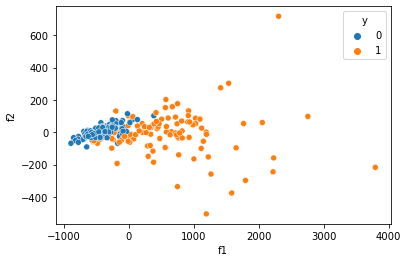

In [33]:
sns.scatterplot(data=df_train, x='f1', y = 'f2', hue = 'y')

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn = KNeighborsClassifier(n_neighbors=5,  p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [56]:
knn.score(X_train, y_train)

0.9215686274509803

In [57]:
knn.score(X_val, y_val)

0.9126984126984127

# Final

In [54]:
knn.score(X_test, y_test)

0.9468085106382979